<a href="https://colab.research.google.com/github/TBKHori/A.I_ARU/blob/main/CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Develop a Convolutional Neural Network From Scratch for MNIST Handwritten Digit Classification

The MNIST handwritten digit classification problem is a standard dataset used in computer vision and deep learning.

Although the dataset is effectively solved, it can be used as the basis for learning and practicing how to develop, evaluate, and use convolutional deep learning neural networks for image classification from scratch. This includes how to develop a robust test harness for estimating the performance of the model, how to explore improvements to the model, and how to save the model and later load it to make predictions on new data.

The MNIST dataset is an acronym that stands for the Modified National Institute of Standards and Technology dataset.
It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9.
The task is to classify a given image of a handwritten digit into one of 10 classes representing integer values from 0 to 9, inclusively.

In [1]:
from IPython.display import Image
Image(url= "1.png")

Install the following required Python Libraries. this might take a while. 

In [2]:
conda install pip

SyntaxError: ignored

In [3]:
pip install --upgrade tensorflow
pip install Keras

SyntaxError: ignored

Import the following Python Libraries.

pyplot library allows you create plots.

mnist library allows you download and manage mnist dataset.

tf tensorflow is the backend of your ANN neural network model.



In [4]:
from keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib.image as img 
import numpy as np
from skimage.transform import rescale, resize

# Downloading the MNIST Dataset.


The MNIST dataset is one of the most common datasets used for image classification and accessible from many different sources. In fact, even Tensorflow and Keras allow us to import and download the MNIST dataset directly from their API. Therefore, I will start with the following two lines to import TensorFlow and MNIST dataset under the Keras API.

Create your training and testing sample x_train and x_test and their corresponding labels y_train and y_test


In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Let's Have a look at our data shape and quantity 

In [6]:
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


Let's iterate through of our dataset samples and check them out. 

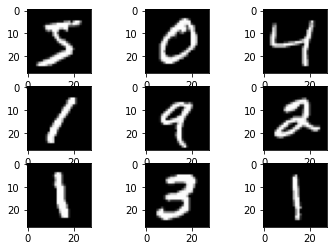

In [7]:
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

# Reshaping and Normalizing the Images


To be able to use the dataset in Keras API, we need 4-dims NumPy arrays. However, as we see above, our array is 3-dims. In addition, we must normalize our data as it is always required in neural network models. We can achieve this by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code). This can be done with the following code:

Adding an extra dimension to our data. The extra dimension takes care of the image batch size.

In [8]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

Let’s convert our images to NumPy array. This allows simple application of arithmetic operation. 

In [9]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

we must normalize our data as it is always required in neural network models. We can achieve this by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code)

In [10]:
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


Let’s import Keras libraries that allow us to build our very first neural network model. 

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

This is how we create CNNs models in Keras. this particular example shows a very simple Sequential model which includes a Convolutional layer, Maxpooling layer, A fully connected flattening layer, a normal fully connected (dense) layer and at the end a softmax layer which converts the logits to probabilities for prediction.  

In [12]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 128)               605824    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

Let's compile our model. Assigning the optimizer [Stochastic Gradian Descend], loss function and our desired evaluation metrics. 

In [13]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


Let's start trainig our model for 5 epochs (5 rounds of feedforward and backpropagation over the entire dataset). This is gonna take a while. 

In [14]:
model.fit(x=x_train,y=y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.5227 - accuracy: 0.8534
Epoch 2/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2325 - accuracy: 0.9312
Epoch 3/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1803 - accuracy: 0.9470
Epoch 4/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1519 - accuracy: 0.9549
Epoch 5/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1329 - accuracy: 0.9607


Let's put out trained model into a real test by evaluating its performance against unseen data from the testing set. 

In [15]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.1017 - accuracy: 0.9701


[0.10170059651136398, 0.9700999855995178]

The results are pretty good for 5 epochs and for such a simple model. We have achieved over 96% accuracy with such a basic model at such a short time. 

Let's make individual predictions using our own hand writing. Open MS paint, create a small square-ish work space and draw your desired number using black colour.

In [16]:
Image(url= "paint.png")

Store your masterpiece as a "sample.png" file and upload it to your jupyter Notebook work space, in the same directory as this file.

In [17]:
Image(url= "3.png")

In [18]:
my_img = img.imread('sample2.png')

In [19]:
r, g, b = my_img[:,:,0], my_img[:,:,1], my_img[:,:,2]
gray_img = 0.2989 * r + 0.5870 * g + 0.1140 * b

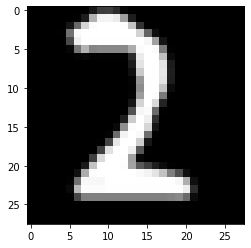

In [20]:
image_resized_gray = resize(gray_img,(28,28))
plt.imshow(image_resized_gray, cmap='gray')

Checkout the prediction of our nifty model

In [21]:
pred = model.predict(image_resized_gray.reshape(1, 28, 28, 1))
print("It seems to be ", pred.argmax())

It seems to be  2
